<a href="https://colab.research.google.com/github/Elena-Shabanova/Neural_networks/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%98%D0%BD%D1%82%D0%B5%D0%BD%D1%81%D0%B8%D0%B2_06_07_08_07_%D0%94%D0%B5%D0%BD%D1%8C_2_%D0%9E%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%B0%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip -q install terra_ai
from terra_ai import терра_ии

Все необходимые библиотеки установлены и готовы к работе


# **Практический материал занятия**

## Классификация отзывов автомобиля Тесла

In [54]:
# Загружаем базу отзывов Tesla
терра_ии.загрузить_базу(база='TESLA')

Загрузка данных завершена 

url: https://storage.googleapis.com/terra_ai/DataSets/tesla.zip


In [55]:
# Выводим примеры
терра_ии.показать_примеры(база = 'TESLA')

В данной базе находятся положительные и негативные отзывы об автомобилях Tesla:
['Негативный отзыв', 'Позитивный отзыв']

Пример отзыва:
Тип отзыва:  Негативный отзыв
Отзывы:
     * После 170 на трассе она чувствует себя неуверенно.  Кстати сидения очень удобными тоже не назовёшь. 


In [56]:
# Задаем параметры для формирования выборок
количество_анализируемых_слов = '10000'
размер_окна = '50'
шаг = '10'
# Создаем выборки для обучения нейронной сети
(обучающая_выборка, метки_обучающей_выборки), (тестовая_выборка, метки_тестовой_выборки) = терра_ии.создать_текстовые_выборки(
    количество_анализируемых_слов,
    размер_окна,
    шаг, 
    путь_к_базе = '/content/Отзывы/')

Формирование выборки завершено


### Эксперименты

In [26]:
# Эксперимент № 1
# Уменьшенный размер эмбеддинг-пространства. Слабая нейронка (меньше слоев, меньше нейронов)
ветвь1 = 'Эмбеддинг-2-'+ количество_анализируемых_слов + '-' + размер_окна + ' Выравнивающий Полносвязный-2'
ветвь2 = 'Полносвязный-4 Полносвязный-2'
ветвь3 = 'Полносвязный-2'
нейронка_тесла_1 = терра_ии.создать_составную_сеть(обучающая_выборка, метки_обучающей_выборки, ветвь1, ветвь2, ветвь3)

Эпоха №1    Время обучения: 2.34c   Точность на обучающей выборке: 60.62%    Точность на проверочной выборке: 56.25%
Эпоха №2    Время обучения: 1.58c   Точность на обучающей выборке: 92.19%    Точность на проверочной выборке: 78.12%
Эпоха №3    Время обучения: 1.58c   Точность на обучающей выборке: 99.64%    Точность на проверочной выборке: 81.25%
Эпоха №4    Время обучения: 1.57c   Точность на обучающей выборке: 99.96%    Точность на проверочной выборке: 84.38%
Эпоха №5    Время обучения: 1.58c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 84.38%
Эпоха №6    Время обучения: 1.61c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 87.5%
Эпоха №7    Время обучения: 1.57c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 87.5%
Эпоха №8    Время обучения: 1.59c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 87.5%
Эпоха №9    Время обучения: 1.56c   Точность на обучающей выборке: 

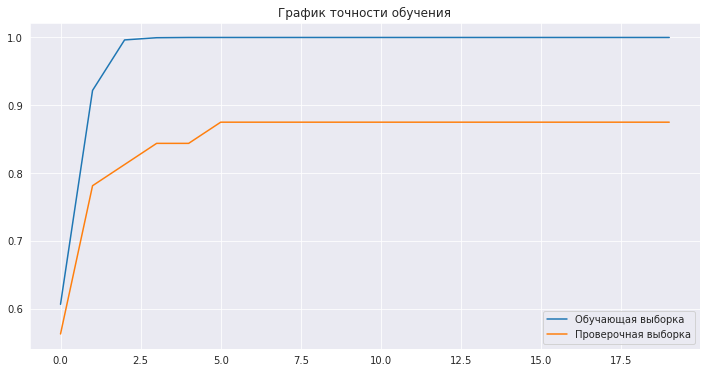

In [27]:
# Обучаем модель
эксперимент_1 = терра_ии.обучение_модели(
    нейронка_тесла_1,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 16,
    количество_эпох = 20)

In [28]:
# Демонстрация результата работы нейронной сети
отзыв = 'Машина скоростная. По трассе идет отлично'
терра_ии.тест_модели_отзывы(нейронка_тесла_1, размер_окна, шаг,
                              отзыв, классы = ['Негативный отзыв', 'Позитивный отзыв'])

Негативный отзыв   -  81.22 %
Позитивный отзыв   -  18.78 %

Нейросеть думает, что это: Негативный отзыв - 81.22%


In [29]:
# Демонстрация результата работы нейронной сети
отзыв = 'Самая быстрая красивая мощная'
терра_ии.тест_модели_отзывы(нейронка_тесла_1, размер_окна, шаг,
                              отзыв, классы = ['Негативный отзыв', 'Позитивный отзыв'])

Негативный отзыв   -  33.56 %
Позитивный отзыв   -  66.44 %

Нейросеть думает, что это: Позитивный отзыв - 66.44%


In [30]:
# Эксперимент № 2
# Размер эмбеддинг-пространства чуть больше. Слабая нейронка.
# Больший размер пакета при обучении
ветвь1 = 'Эмбеддинг-10-' + количество_анализируемых_слов + '-' + размер_окна + ' Выравнивающий Полносвязный-8'
ветвь2 = 'Полносвязный-32 Полносвязный-16 Полносвязный-8'
ветвь3 = 'Полносвязный-8'
нейронка_тесла_2 = терра_ии.создать_составную_сеть(обучающая_выборка, метки_обучающей_выборки, ветвь1, ветвь2, ветвь3)

Эпоха №1    Время обучения: 1.87c   Точность на обучающей выборке: 51.69%    Точность на проверочной выборке: 37.5%
Эпоха №2    Время обучения: 1.11c   Точность на обучающей выборке: 89.19%    Точность на проверочной выборке: 68.75%
Эпоха №3    Время обучения: 1.08c   Точность на обучающей выборке: 99.98%    Точность на проверочной выборке: 81.25%
Эпоха №4    Время обучения: 1.09c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 93.75%
Эпоха №5    Время обучения: 1.09c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 93.75%
Эпоха №6    Время обучения: 1.1c    Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 93.75%
Эпоха №7    Время обучения: 1.09c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 93.75%
Эпоха №8    Время обучения: 1.06c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 93.75%
Эпоха №9    Время обучения: 1.02c   Точность на обучающей выборке

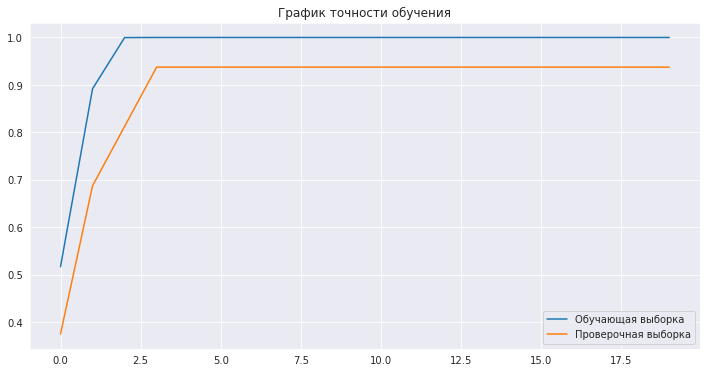

In [31]:
# Обучаем модель
эксперимент_2 = терра_ии.обучение_модели(
    нейронка_тесла_2,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 32,
    количество_эпох = 20)

In [32]:
# Демонстрация результата работы нейронной сети
отзыв = 'Обзор не очень, зеркала маленькие, заднее стекло тоже'
терра_ии.тест_модели_отзывы(нейронка_тесла_2, размер_окна, шаг,
                              отзыв, классы = ['Негативный отзыв', 'Позитивный отзыв'])

Негативный отзыв   -  78.41 %
Позитивный отзыв   -  21.59 %

Нейросеть думает, что это: Негативный отзыв - 78.41%


In [33]:
# Демонстрация результата работы нейронной сети
отзыв = 'Самая быстрая красивая мощная'
терра_ии.тест_модели_отзывы(нейронка_тесла_2, размер_окна, шаг,
                              отзыв, классы = ['Негативный отзыв', 'Позитивный отзыв'])

Негативный отзыв   -  51.67 %
Позитивный отзыв   -  48.33 %

Нейросеть думает, что это: Негативный отзыв - 51.67%


In [34]:
# Эксперимент № 3
# Еще увеличим размер эмбеддинг-пространства. Нейронка посильнее.
ветвь1 = 'Эмбеддинг-50-' + количество_анализируемых_слов + '-' + размер_окна + ' Выравнивающий Полносвязный-16'
ветвь2 = 'Полносвязный-64 Полносвязный-32 Полносвязный-16'
ветвь3 = 'Полносвязный-32'
нейронка_тесла_3 = терра_ии.создать_составную_сеть(обучающая_выборка, метки_обучающей_выборки, ветвь1, ветвь2, ветвь3)

Эпоха №1    Время обучения: 2.42c   Точность на обучающей выборке: 59.6%     Точность на проверочной выборке: 53.12%
Эпоха №2    Время обучения: 1.58c   Точность на обучающей выборке: 98.89%    Точность на проверочной выборке: 87.5%
Эпоха №3    Время обучения: 1.6c    Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 90.62%
Эпоха №4    Время обучения: 1.59c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 90.62%
Эпоха №5    Время обучения: 1.58c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 90.62%
Эпоха №6    Время обучения: 1.61c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 90.62%
Эпоха №7    Время обучения: 1.56c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 90.62%
Эпоха №8    Время обучения: 1.57c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 90.62%
Эпоха №9    Время обучения: 1.59c   Точность на обучающей выборке

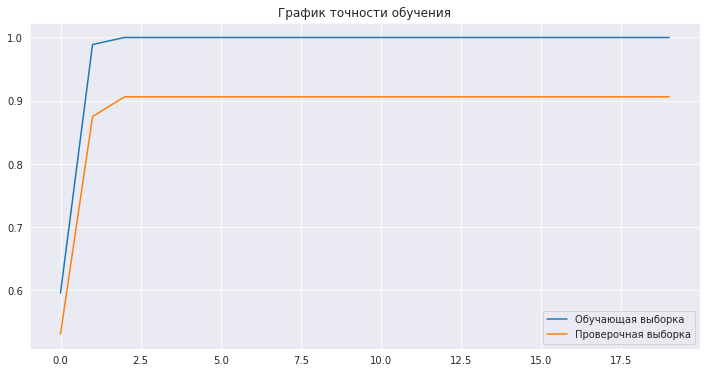

In [35]:
# Обучаем модель
эксперимент_3 = терра_ии.обучение_модели(
    нейронка_тесла_3,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 32,
    количество_эпох = 20)

In [36]:
# Демонстрация результата работы нейронной сети
отзыв = 'После 170 на трассе она чувствует себя неуверенно.'
терра_ии.тест_модели_отзывы(нейронка_тесла_3, размер_окна, шаг,
                              отзыв, классы = ['Негативный отзыв', 'Позитивный отзыв'])

Негативный отзыв   -  39.13 %
Позитивный отзыв   -  60.87 %

Нейросеть думает, что это: Позитивный отзыв - 60.87%


In [37]:
# Демонстрация результата работы нейронной сети
отзыв = 'Самая быстрая красивая мощная'
терра_ии.тест_модели_отзывы(нейронка_тесла_3, размер_окна, шаг,
                              отзыв, классы = ['Негативный отзыв', 'Позитивный отзыв'])

Негативный отзыв   -  11.13 %
Позитивный отзыв   -  88.87 %

Нейросеть думает, что это: Позитивный отзыв - 88.87%


In [57]:
# Эксперимент № 4
# Более сильная нейронка
ветвь1 = 'Эмбеддинг-100-' + количество_анализируемых_слов + '-' + размер_окна + ' Выравнивающий Полносвязный-32'
ветвь2 = 'Полносвязный-128 Полносвязный-64 Полносвязный-32'
ветвь3 = 'Полносвязный-32'
нейронка_тесла_4 = терра_ии.создать_составную_сеть(обучающая_выборка, метки_обучающей_выборки, ветвь1, ветвь2, ветвь3)

Эпоха №1    Время обучения: 3.39c   Точность на обучающей выборке: 69.35%    Точность на проверочной выборке: 90.62%
Эпоха №2    Время обучения: 2.66c   Точность на обучающей выборке: 99.85%    Точность на проверочной выборке: 90.62%
Эпоха №3    Время обучения: 2.65c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 90.62%
Эпоха №4    Время обучения: 2.58c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 90.62%
Эпоха №5    Время обучения: 2.54c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 90.62%
Эпоха №6    Время обучения: 2.55c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 90.62%
Эпоха №7    Время обучения: 2.56c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 90.62%
Эпоха №8    Время обучения: 2.56c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 90.62%
Эпоха №9    Время обучения: 2.62c   Точность на обучающей выборк

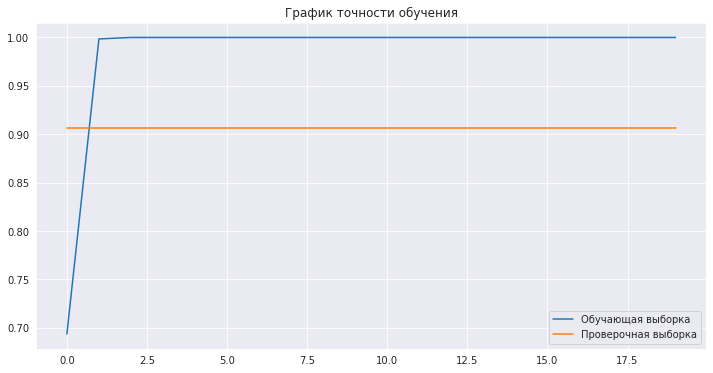

In [58]:
# Обучаем модель
эксперимент_4 = терра_ии.обучение_модели(
    нейронка_тесла_4,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 32,
    количество_эпох = 20)

In [59]:
# Демонстрация результата работы нейронной сети
отзыв = 'Машина мне нравится, хоть она и дорогая. Удобная в эксплуатации'
терра_ии.тест_модели_отзывы(нейронка_тесла_4, размер_окна, шаг,
                              отзыв, классы = ['Негативный отзыв', 'Позитивный отзыв'])

Негативный отзыв   -  59.65 %
Позитивный отзыв   -  40.35 %

Нейросеть думает, что это: Негативный отзыв - 59.65%


In [60]:
# Демонстрация результата работы нейронной сети
отзыв = 'Самая быстрая красивая мощная'
терра_ии.тест_модели_отзывы(нейронка_тесла_4, размер_окна, шаг,
                              отзыв, классы = ['Негативный отзыв', 'Позитивный отзыв'])

Негативный отзыв   -  42.58 %
Позитивный отзыв   -  57.42 %

Нейросеть думает, что это: Позитивный отзыв - 57.42%


In [61]:
# Эксперимент № 5
# Еще усилим модель
ветвь1 = 'Эмбеддинг-100-' + количество_анализируемых_слов + '-' + размер_окна + ' Выравнивающий Полносвязный-100'
ветвь2 = 'Полносвязный-1024 Полносвязный-256 Полносвязный-64'
ветвь3 = 'Полносвязный-100'
нейронка_тесла_5 = терра_ии.создать_составную_сеть(обучающая_выборка, метки_обучающей_выборки, ветвь1, ветвь2, ветвь3)

In [62]:
# Обучаем модель
эксперимент_5 = терра_ии.обучение_модели(
    нейронка_тесла_5,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 16,
    количество_эпох = 20)

Эпоха №1    Время обучения: 6.86c   Точность на обучающей выборке: 91.46%    Точность на проверочной выборке: 84.38%
Эпоха №2    Время обучения: 5.89c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 84.38%


KeyboardInterrupt: ignored

In [ ]:
# Демонстрация результата работы нейронной сети
отзыв = 'Нереально шикарная машина. Нет слов просто. Мечта!'
терра_ии.тест_модели_отзывы(нейронка_тесла_5, размер_окна, шаг,
                              отзыв, классы = ['Негативный отзыв', 'Позитивный отзыв'])

In [ ]:
# Демонстрация результата работы нейронной сети
отзыв = 'Самая быстрая красивая мощная'
терра_ии.тест_модели_отзывы(нейронка_тесла_5, размер_окна, шаг,
                              отзыв, классы = ['Негативный отзыв', 'Позитивный отзыв'])

In [63]:
# Эксперимент № 6
# Сильная модель. Еще больший размер эмбеддинг-пространства
ветвь1 = 'Эмбеддинг-300-' + количество_анализируемых_слов + '-' + размер_окна + ' Выравнивающий Полносвязный-200'
ветвь2 = 'Полносвязный-4096 Полносвязный-512 Полносвязный-128' 
ветвь3 = 'Полносвязный-100'

нейронка_тесла_6 = терра_ии.создать_составную_сеть(
    обучающая_выборка, метки_обучающей_выборки,
    ветвь1, ветвь2, ветвь3)

In [64]:
# Обучаем модель
эксперимент_6 = терра_ии.обучение_модели(
    нейронка_тесла_6,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 16,
    количество_эпох = 20)

Эпоха №1    Время обучения: 14.93c  Точность на обучающей выборке: 95.35%    Точность на проверочной выборке: 87.5%
Эпоха №2    Время обучения: 12.63c  Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 87.5%
Эпоха №3    Время обучения: 12.63c  Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 87.5%
Эпоха №4    Время обучения: 12.63c  Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 87.5%
Эпоха №5    Время обучения: 12.99c  Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 87.5%
Эпоха №6    Время обучения: 13.11c  Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 87.5%


KeyboardInterrupt: ignored

In [ ]:
# Демонстрация результата работы нейронной сети
отзыв = 'Главная проблема у Тесла это дизайн'
терра_ии.тест_модели_отзывы(нейронка_тесла_6, размер_окна, шаг,
                              отзыв, классы = ['Негативный отзыв', 'Позитивный отзыв'])

In [ ]:
# Демонстрация результата работы нейронной сети
отзыв = 'Самая быстрая красивая мощная'
терра_ии.тест_модели_отзывы(нейронка_тесла_6, размер_окна, шаг,
                              отзыв, классы = ['Негативный отзыв', 'Позитивный отзыв'])

## Определение стоимости квартиры в Москве

In [ ]:
# Загружаем базу квартир
терра_ии.загрузить_базу(база = 'КВАРТИРЫ', 
                   справка = 'Показать')

In [ ]:
# Показываем примеры
терра_ии.показать_пример_квартиры(количество=3)

In [ ]:
# Создаем выборки
(обучающая_выборка, метки_обучающей_выборки), (тестовая_выборка, метки_тестовой_выборки), инструменты = терра_ии.создать_выборки_квартир()

In [ ]:
ветвь1 = 'Полносвязный-100 Полносвязный-50-linear'
ветвь2 = 'Полносвязный-500-linear'
финальная_часть = 'Полносвязный-1000 Полносвязный-500 Полносвязный-100 Полносвязный-1-linear'
нейронка_квартиры_1 = терра_ии.создать_составную_сеть_квартиры(обучающая_выборка, ветвь1, ветвь2, финальная_часть)

In [ ]:
# Выводим схему модели
терра_ии.схема_модели(нейронка_квартиры_1)

In [ ]:
# Обучаем модель
эксперимент_1 = терра_ии.обучение_модели_квартиры(
    нейронка_квартиры_1,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 256,
    количество_эпох = 40,
    инструменты = инструменты)

In [ ]:
#@title Тестирование модели: выберите параметры
метро = "\u0421\u043F\u0430\u0440\u0442\u0430\u043A \u043C." #@param ['Авиамоторная м.', 'Автозаводская м.', 'Автозаводская м. (МЦК)', 'Академическая м.', 'Алабушево станция', 'Александровский Сад м.', 'Алексеевская м.', 'Алма-Атинская м.', 'Алтуфьево м.', 'Андроновка м. (МЦК)', 'Аннино м.', 'Апрелевка станция', 'Арбатская м.', 'Аэропорт (старая) станция', 'Аэропорт Внуково станция', 'Аэропорт м.', 'Бабушкинская м.', 'Багратионовская м.', 'Балтийская м. (МЦК)', 'Баррикадная м.', 'Бауманская м.', 'Беговая м.', 'Бекасово-1 станция', 'Белокаменная м. (МЦК)', 'Беломорская м.', 'Белорусская м.', 'Беляево м.', 'Бибирево м.', 'Библиотека им.Ленина м.', 'Битцевский парк м.', 'Борисово м.', 'Боровицкая м.', 'Боровское шоссе м.', 'Ботанический сад м.', 'Ботанический сад м. (МЦК)', 'Братиславская м.', 'Бульвар Адмирала Ушакова м.', 'Бульвар Дмитрия Донского м.', 'Бульвар Рокоссовского м.', 'Бульвар Рокоссовского м. (МЦК)', 'Бунинская аллея м.', 'Бутырская м.', 'ВДНХ м.', 'Варшавская м.', 'Верхние Котлы м. (МЦК)', 'Верхние Лихоборы м.', 'Весенняя станция', 'Владыкино м.', 'Внуково станция', 'Водный стадион м.', 'Войковская м.', 'Волгоградский проспект м.', 'Волжская м.', 'Волоколамская м.', 'Воробьевы Горы м.', 'Выставочная м.', 'Выхино м.', 'Говорово м.', 'Гривно станция', 'Дачная станция', 'Деловой центр м.', 'Динамо м.', 'Дмитровская м.', 'Добрынинская м.', 'Домодедовская м.', 'Достоевская м.', 'Дубровка м.', 'Дубровка м. (МЦК)', 'Жулебино м.', 'ЗИЛ м. (МЦК)', 'Зорге м. (МЦК)', 'Зябликово м.', 'Измайлово м. (МЦК)', 'Измайловская м.', 'Калужская м.', 'Кантемировская м.', 'Каховская м.', 'Каширская м.', 'Киевская м.', 'Китай-Город м.', 'Кожуховская м.', 'Кокошкино станция', 'Коломенская м.', 'Колхозная станция', 'Коммунарка м.', 'Комсомольская м.', 'Коньково м.', 'Коптево м. (МЦК)', 'Косино м.', 'Котельники м.', 'Красногвардейская м.', 'Краснопресненская м.', 'Красносельская м.', 'Красные ворота м.', 'Крекшино станция', 'Крестьянская Застава м.', 'Кропоткинская м.', 'Крылатское м.', 'Крымская м. (МЦК)', 'Кузнецкий мост м.', 'Кузьминки м.', 'Кунцевская м.', 'Курская м.', 'Кутузовская м.', 'Кутузовская м. (МЦК)', 'Ленинский проспект м.', 'Лермонтовский проспект м.', 'Лесопарковая м.', 'Лихоборы м. (МЦК)', 'Локомотив м. (МЦК)', 'Ломоносовский проспект м.', 'Лубянка м.', 'Лужники м. (МЦК)', 'Лухмановская м.', 'Львовская станция', 'Люблино м.', 'Марксистская м.', 'Марьина Роща м.', 'Марьино м.', 'Маяковская м.', 'Медведково м.', 'Международная м.', 'Менделеевская м.', 'Минская м.', 'Митино м.', 'Мичуринец станция', 'Мичуринский проспект м.', 'Молодежная м.', 'Мякинино м.', 'Нагатинская м.', 'Нагорная м.', 'Нахимовский проспект м.', 'Некрасовка м.', 'Нижегородская м. (МЦК)', 'Нижегородская улица м.', 'Новогиреево м.', 'Новокосино м.', 'Новокузнецкая м.', 'Новопеределкино м.', 'Новослободская м.', 'Новохохловская м. (МЦК)', 'Новоясеневская м.', 'Новые Черемушки м.', 'Озерная м.', 'Окружная м.', 'Окружная м. (МЦК)', 'Окская улица м.', 'Октябрьская м.', 'Октябрьское поле м.', 'Ольховая м.', 'Орехово м.', 'Отрадное м.', 'Охотный ряд м.', 'Павелецкая м.', 'Панфиловская м. (МЦК)', 'Парк Победы м.', 'Парк культуры м.', 'Партизанская м.', 'Первомайская м.', 'Перово м.', 'Петровский парк м.', 'Петровско-Разумовская м.', 'Печатники м.', 'Пионерская м.', 'Планерная м.', 'Площадь Гагарина м. (МЦК)', 'Площадь Ильича м.', 'Площадь Революции м.', 'Победа станция', 'Подольск станция', 'Полежаевская м.', 'Полянка м.', 'Пражская м.', 'Преображенская площадь м.', 'Прокшино м.', 'Пролетарская м.', 'Проспект Вернадского м.', 'Проспект Мира м.', 'Профсоюзная м.', 'Пушкинская м.', 'Пятницкое шоссе м.', 'Раменки м.', 'Рассказовка м.', 'Рассудово станция', 'Речной вокзал м.', 'Рижская м.', 'Римская м.', 'Ростокино м. (МЦК)', 'Румянцево м.', 'Рязанский проспект м.', 'Савеловская м.', 'Савеловская метро', 'Саларьево м.', 'Свиблово м.', 'Севастопольская м.', 'Селигерская м.', 'Семеновская м.', 'Серпуховская м.', 'Силикатная станция', 'Славянский бульвар м.', 'Смоленская м.', 'Сокол м.', 'Соколиная Гора м. (МЦК)', 'Сокольники м.', 'Солнцево м.', 'Спартак м.', 'Спортивная м.', 'Сретенский бульвар м.', 'Стахановская м.', 'Столбово м.', 'Стрешнево м. (МЦК)', 'Строгино м.', 'Студенческая м.', 'Сухаревская м.', 'Сходненская м.', 'Таганская м.', 'Тверская м.', 'Театральная м.', 'Текстильщики м.', 'Теплый стан м.', 'Технопарк м.', 'Тимирязевская м.', 'Толстопальцево станция', 'Третьяковская м.', 'Тропарево м.', 'Трубная м.', 'Тульская м.', 'Тургеневская м.', 'Тушинская м.', 'Угрешская м. (МЦК)', 'Улица 1905 года м.', 'Улица Академика Янгеля м.', 'Улица Горчакова м.', 'Улица Дмитриевского м.', 'Улица Скобелевская м.', 'Улица Старокачаловская м.', 'Университет м.', 'Филатов луг м.', 'Филевский парк м.', 'Фили м.', 'Фонвизинская м.', 'Фрунзенская м.', 'Ховрино м.', 'Хорошево м. (МЦК)', 'Хорошевское м.', 'ЦСКА м.', 'Царицыно м.', 'Цветной бульвар м.', 'Черкизовская м.', 'Чертановская м.', 'Чеховская м.', 'Чистые пруды м.', 'Чкаловская м.', 'Шаболовская м.', 'Шелепиха м.', 'Шелепиха м. (МЦК)', 'Шипиловская м.', 'Шоссе Энтузиастов м.', 'Шоссе Энтузиастов м. (МЦК)', 'Щелковская м.', 'Щербинка станция', 'Щукинская м.', 'Электрозаводская м.', 'Юго-Восточная м.', 'Юго-Западная м.', 'Южная м.', 'Ясенево м.']
до_станции =  4#@param {type:"integer"}
способ_передвижения = "\u043F\u0435\u0448\u043A\u043E\u043C" #@param ['пешком', 'транспорт']
этаж =  1#@param {type:"integer"}
всего_этажей =  14#@param {type:"integer"}
тип_балкона = 'Л' #@param ['Л', 'Б', '2Б', '-', '2Б2Л', 'БЛ', '3Б', '2Л', 'Эрк', 'Б2Л', 'ЭркЛ', '3Л', '4Л', '*Л', '*Б']
тип_санузла = '2' #@param ['2', 'Р', 'С', '-', '2С', '+', '4Р', '2Р', '3С', '4С', '4', '3', '3Р']
площадь = 87 #@param {type:"number"}
описание = '\u043F\u0440\u0435\u043A\u0440\u0430\u0441\u043D\u0430\u044F \u043A\u0432\u0430\u0440\u0442\u0438\u0440\u0430 \u0440\u044F\u0434\u043E\u043C \u0441 \u043F\u0430\u0440\u043A\u043E\u043C' #@param {type:"string"}

In [ ]:
# Тестируем модель
терра_ии.тест_модели_квартиры(
    нейронка_квартиры_1, инструменты, 
    метро, до_станции, способ_передвижения, этаж, всего_этажей, тип_балкона, тип_санузла, площадь, описание)

## Подбор кандидата на должность менеджера по продажам 

In [40]:
# Скачиваем базу вакансий
терра_ии.загрузить_базу(база = 'ВАКАНСИИ',
                    справка = 'Показать')

Загрузка данных завершена 

url: https://storage.googleapis.com/terra_ai/DataSets/HR.zip
Вы скачали базу вакансий.


In [41]:
# Примеры из базы
терра_ии.показать_примеры(
    база = 'Вакансии')

Пример резюме:

Пол:                         Ж
Возраст:                     28
Город:                       Москва
Готовность к переезду:       готов к переезду
Готовность к командировкам:  готов к командировкам
Гражданство:                 Россия
Разрешение на работу:        Россия
Знания языков:               Русский Английский
Образование:                 Высшее образование
Дополнительное образование:  Национальный исследовательский технологический университет НИТУ МИСиС
Зарплата:                    120000.0
Время в пути до работы:      не более полутора часов
Занятость:                   полная занятость
График:                      полный день
Опыт работы (мес):           87
Обязанности на пред.работе:  Активный поиск и привлечение потенциальных клиентов; Участие в отраслевых тендерахВыявление потребно
                             стей клиентов в продукции, реализуемой компанией, согласовывание заказов с клиентами в соответствии 
                             с его потребностями;Пр

In [42]:
# Создаем обучающую и проверочную выборки
(обучающая_выборка, метки_обучающей_выборки), (тестовая_выборка, метки_тестовой_выборки) = терра_ии.создать_выборки_вакансии()

In [43]:
# Указываем слои создаваемой модели
слои = 'Полносвязный-128\
 Полносвязный-2' # Указываем слои создаваемой модели

# Получаем входной размер данных
входной_размер = терра_ии.получить_входной_размер(обучающая_выборка)

# Создаем модель
нейронка_вакансии_1 = терра_ии.создать_сеть(
    слои = слои,
    входной_размер = входной_размер,
    задача='классификация вакансий'
    )

Создана модель нейронной сети!


Схема модели:


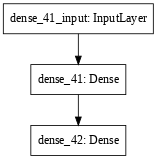

In [44]:
# Выводим структуру модели
терра_ии.схема_модели(нейронка_вакансии_1)

Эпоха №1    Время обучения: 0.42c   Точность на обучающей выборке: 53.0%     Точность на проверочной выборке: 62.12%
Эпоха №2    Время обучения: 0.04c   Точность на обучающей выборке: 58.0%     Точность на проверочной выборке: 62.88%
Эпоха №3    Время обучения: 0.04c   Точность на обучающей выборке: 59.2%     Точность на проверочной выборке: 68.18%
Эпоха №4    Время обучения: 0.03c   Точность на обучающей выборке: 62.6%     Точность на проверочной выборке: 70.83%
Эпоха №5    Время обучения: 0.04c   Точность на обучающей выборке: 63.0%     Точность на проверочной выборке: 70.08%
Эпоха №6    Время обучения: 0.03c   Точность на обучающей выборке: 61.6%     Точность на проверочной выборке: 63.64%
Эпоха №7    Время обучения: 0.04c   Точность на обучающей выборке: 63.6%     Точность на проверочной выборке: 68.18%
Эпоха №8    Время обучения: 0.04c   Точность на обучающей выборке: 65.2%     Точность на проверочной выборке: 70.83%
Эпоха №9    Время обучения: 0.04c   Точность на обучающей выборк

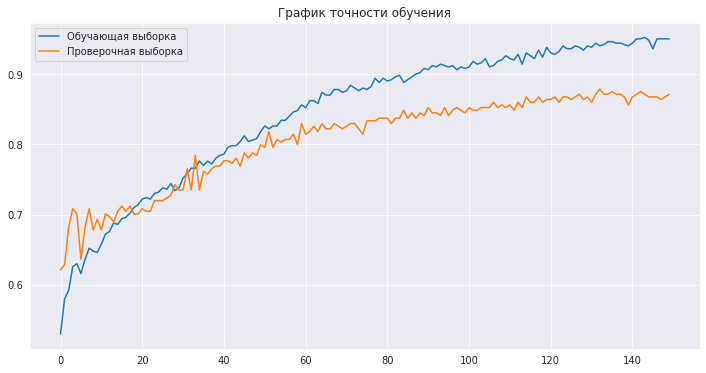

In [45]:
# Обучаем модель
эксперимент_1 = терра_ии.обучение_модели(
    нейронка_вакансии_1,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 64,
    количество_эпох = 150)

In [46]:
терра_ии.тест_модели_вакансии(нейронка_вакансии_1,
                              тестовая_выборка, метки_тестовой_выборки)

Тестовое резюме:

Пол:                         Ж
Возраст:                     36
Город:                       Москва
Готовность к переезду:       не готов к переезду
Готовность к командировкам:  готов к командировкам
Гражданство:                 Россия
Разрешение на работу:        Россия
Знания языков:               Русский Английский Украинский
Образование:                 Высшее образование
Дополнительное образование:  Данные не указаны
Зарплата:                    40000.0
Время в пути до работы:      не имеет значения
Занятость:                   частичная занятость, проектная работа, полная занятость
График:                      удаленная работа
Опыт работы (мес):           89
Обязанности на пред.работе:  распределение, отслеживание и контроль маршрутов, сбор и обработка информации, а также анализ програ
                             ммного обеспечения стран Европы, Латинской Америки и Азии, Наполнение сайта, редактирование, описани
                             е товара. Обработка з

In [47]:
# Эксперимент. Многократное обучение и усредненеие результатов

слои = 'Полносвязный-256\
 Полносвязный-2' # Указываем слои создаваемой модели

# Получаем входной размер данных
входной_размер = терра_ии.получить_входной_размер(обучающая_выборка)

# Создаем модель
нейронка_вакансии_2 = терра_ии.создать_сеть(
    слои = слои,
    входной_размер = входной_размер,
    задача='классификация вакансий'
    )

Создана модель нейронной сети!


Запуск №1   Время обучения: 4.45c Точность на обучающей выборке: 96.8%       Точность на проверочной выборке: 87.88%
Запуск №2   Время обучения: 4.36c Точность на обучающей выборке: 97.2%       Точность на проверочной выборке: 88.64%
Запуск №3   Время обучения: 4.88c Точность на обучающей выборке: 97.4%       Точность на проверочной выборке: 88.64%
Запуск №4   Время обучения: 4.75c Точность на обучающей выборке: 97.8%       Точность на проверочной выборке: 89.02%
Запуск №5   Время обучения: 4.37c Точность на обучающей выборке: 97.0%       Точность на проверочной выборке: 89.02%
Запуск №6   Время обучения: 4.22c Точность на обучающей выборке: 97.4%       Точность на проверочной выборке: 89.02%
Запуск №7   Время обучения: 4.3c  Точность на обучающей выборке: 97.2%       Точность на проверочной выборке: 89.02%
Запуск №8   Время обучения: 5.04c Точность на обучающей выборке: 98.0%       Точность на проверочной выборке: 89.02%
Запуск №9   Время обучения: 4.21c Точность на обучающей выборке:

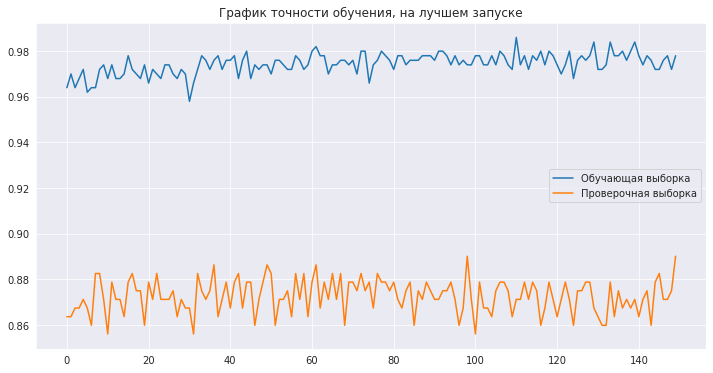

In [48]:
эксперимент_2 = терра_ии.обучение_модели(
    нейронка_вакансии_2,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 64,
    количество_эпох = 150, 
    количество_запусков = 10)

In [49]:
терра_ии.тест_модели_вакансии(нейронка_вакансии_2,
                        тестовая_выборка, метки_тестовой_выборки)

Тестовое резюме:

Пол:                         Ж
Возраст:                     34
Город:                       Химки
Готовность к переезду:       готов к переезду
Готовность к командировкам:  готов к командировкам
Гражданство:                 Россия
Разрешение на работу:        Россия
Знания языков:               Русский Английский
Образование:                 Высшее образование
Дополнительное образование:  Данные не указаны
Зарплата:                    40000.0
Время в пути до работы:      не имеет значения
Занятость:                   частичная занятость, полная занятость
График:                      гибкий график, полный день, удаленная работа
Опыт работы (мес):           144
Обязанности на пред.работе:  прием входящих и исходящих звонков,заведение,заполнение и обработка заявок на кредиты, кредитные и д
                             ебетовые карты, вклады, выполнение KPI, в том числе KPI по прослушке., прием и осуществление телефон
                             ных звонков;работа с вход

# **Домашнее задание**

In [4]:
!pip -q install terra_ai
from terra_ai import терра_ии

## Задание № 1. Подбор кандидата на должность менеджера по продажам.  

Создайте нейросеть, которая будет определять подходит ли кандидат на должность в Университете искусственного интеллекта.  

1. Загрузите базу;  
2. Покажите примеры из загруженной базы;  
3. Сделайте предобработку данных для обучающей и тестовой выборки;  
4. Создайте полносвязную модель;  
5. Продемонстрируйте схему созданной модели;  
6. Обучите свою модель;  
7. Проведите тестирование модели.  

Постарайтесь воспроизвести все этапы по памяти.

### Работа с базой.

In [11]:
# Скачиваем базу вакансий
терра_ии.загрузить_базу(база = 'ВАКАНСИИ',
                        справка = 'Показать')

Загрузка данных завершена 

url: https://storage.googleapis.com/terra_ai/DataSets/HR.zip
Вы скачали базу вакансий.


In [12]:
# Примеры из базы
терра_ии.показать_примеры(база = 'ВАКАНСИИ')

Обработка базы и создание выборок.

In [13]:
# Создаем обучающую и проверочную выборки
(обучающая_выборка, метки_обучающей_выборки), (тестовая_выборка, метки_тестовой_выборки) = терра_ии.создать_выборки_вакансии()

### Создание сети

Создайте нейронную сеть, которая будет включать в себя полносвязные слои в формате:

```
# Пример, Полносвязный-128 означает, что мы используем Полновязный слой на 128 нейронов.
слои='Полносвязный-128\
 Полносвязный-2'
```
Попробуйте изменить количество нейронов и обучите модель.

In [14]:
# Указываем слои создаваемой модели
слои = 'Полносвязный-256\
 Полносвязный-4\
 Полносвязный-2' # Указываем слои создаваемой модели


# Получаем входной размер данных
входной_размер = терра_ии.получить_входной_размер(обучающая_выборка)

# Создаем модель
нейронка_подбор_кандидата = терра_ии.создать_сеть(
    слои = слои,
    входной_размер = входной_размер,
    задача='классификация изображений'
    )

Создана модель нейронной сети!


Визуализация структуры.

Схема модели:


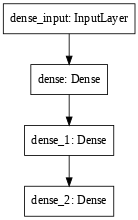

In [15]:
# Покажите структуру сети, с помощью функции из terra_ai. терра_ии.схема_модели(внутри функции указывается нейросеть, которую вы создали)
терра_ии.схема_модели(нейронка_подбор_кандидата)

### Обучение модели.

Запуск №1   Время обучения: 5.45c Точность на обучающей выборке: 97.2%       Точность на проверочной выборке: 89.77%
Запуск №2   Время обучения: 4.75c Точность на обучающей выборке: 97.0%       Точность на проверочной выборке: 90.15%
Запуск №3   Время обучения: 7.22c Точность на обучающей выборке: 97.8%       Точность на проверочной выборке: 89.77%
Запуск №4   Время обучения: 4.56c Точность на обучающей выборке: 97.6%       Точность на проверочной выборке: 90.15%
Запуск №5   Время обучения: 4.59c Точность на обучающей выборке: 97.2%       Точность на проверочной выборке: 90.53%
Запуск №6   Время обучения: 5.21c Точность на обучающей выборке: 97.6%       Точность на проверочной выборке: 89.77%
Запуск №7   Время обучения: 4.71c Точность на обучающей выборке: 97.0%       Точность на проверочной выборке: 90.53%
Запуск №8   Время обучения: 4.88c Точность на обучающей выборке: 95.6%       Точность на проверочной выборке: 90.15%
Запуск №9   Время обучения: 4.62c Точность на обучающей выборке:

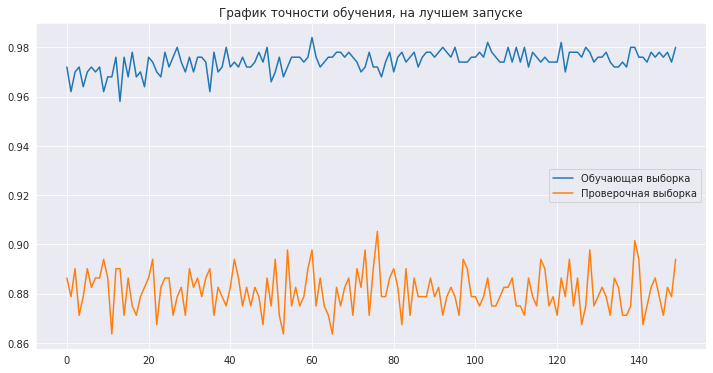

In [16]:
# Обучаем модель
эксперимент = терра_ии.обучение_модели(
    нейронка_подбор_кандидата,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 60,
    количество_эпох = 150,
    количество_запусков = 10)

### Тестирование модели.

In [17]:
терра_ии.тест_модели_вакансии(нейронка_подбор_кандидата,
                              тестовая_выборка, метки_тестовой_выборки)

Тестовое резюме:

Пол:                         М
Возраст:                     27
Город:                       Москва
Готовность к переезду:       готов к переезду
Готовность к командировкам:  готов к командировкам
Гражданство:                 Россия
Разрешение на работу:        Россия
Знания языков:               Русский Английский
Образование:                 Высшее образование
Дополнительное образование:  Данные не указаны
Зарплата:                    70000.0
Время в пути до работы:      не имеет значения
Занятость:                   полная занятость
График:                      гибкий график, полный день
Опыт работы (мес):           61
Обязанности на пред.работе:  Conversational English training for entrepreneurs.Application of coaching elements to work out the "
                             blind spots" of students and for motivation.The implementation of mind maps to get rid of psychologi
                             cal blocks during communication in English.Preparing students to

## Задание № 2. Классификация отзывов автомобиля Тесла.  

Создайте нейросеть, которая будет распознавать эмоциональную окраску отзывов из базы Tesla.

1. Загрузите базу;  
2. Покажите примеры из загруженной базы;  
3. Сделайте предобработку данных для обучающей и тестовой выборки;  
4. Создайте полносвязную модель;  
5. Продемонстрируйте схему созданной модели;  
6. Обучите свою модель;  
7. Проведите тестирование модели.  

Постарайтесь воспроизвести все этапы по памяти.

### Работа с базой.

In [18]:
# Загружаем базу отзывов Tesla
терра_ии.загрузить_базу(база = 'Tesla', 
                        справка = 'Показать')

Загрузка данных завершена 

url: https://storage.googleapis.com/terra_ai/DataSets/tesla.zip
Вы скачали базу отзывов владельцев автомобилями Tesla


In [19]:
# Выводим примеры
терра_ии.показать_примеры(база = 'Tesla')

Обработка базы и создание выборок.

In [20]:
# Задаем параметры для формирования выборок
количество_анализируемых_слов = 10000
размер_окна = 20
шаг = 5
# Создаем выборки для обучения нейронной сети
(обучающая_выборка, метки_обучающей_выборки), (тестовая_выборка, метки_тестовой_выборки) = терра_ии.создать_текстовые_выборки(
    количество_анализируемых_слов,
    размер_окна,
    шаг, 
    путь_к_базе = '/content/Отзывы/')

Формирование выборки завершено


### Создание сети.

Создайте сеть, состоящую из 3-х ветвей, в которую будут входить слои рассмотренные на вебинаре, такие как:

*   Эмбеддинг
*   Выравнивающий
*   Полносвязный

In [65]:
# Создаем нейронную сеть
ветвь1 = 'Эмбеддинг-10-' + количество_анализируемых_слов + '-' + размер_окна + ' Выравнивающий Полносвязный-8'
ветвь2 = 'Полносвязный-64 Полносвязный-32 Полносвязный-16'
ветвь3 = 'Полносвязный-8'

нейронка_ДЗ_2 = терра_ии.создать_составную_сеть(
    обучающая_выборка, метки_обучающей_выборки,
    ветвь1, ветвь2, ветвь3)

Визуализация структуры.

Схема модели:


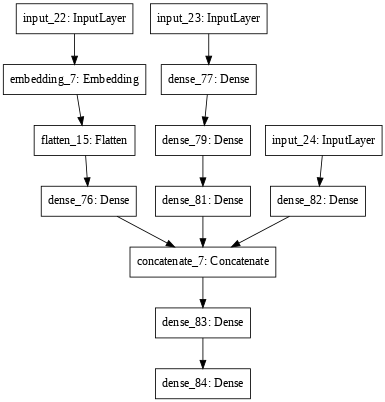

In [66]:
# Покажите структуру сети, с помощью функции из terra_ai. терра_ии.схема_модели(внутри функции указывается нейросеть, которую вы создали)
терра_ии.схема_модели(нейронка_ДЗ_2)

### Обучение модели.

Запуск №1   Время обучения: 14.74cТочность на обучающей выборке: 100.0%      Точность на проверочной выборке: 90.62%
Запуск №2   Время обучения: 15.73cТочность на обучающей выборке: 100.0%      Точность на проверочной выборке: 90.62%
Запуск №3   Время обучения: 14.49cТочность на обучающей выборке: 100.0%      Точность на проверочной выборке: 93.75%
Запуск №4   Время обучения: 14.65cТочность на обучающей выборке: 100.0%      Точность на проверочной выборке: 93.75%
Запуск №5   Время обучения: 14.76cТочность на обучающей выборке: 100.0%      Точность на проверочной выборке: 93.75%

Средняя точность на обучающей выборке:    100.0% 
Средняя точность на проверочной выборке:  92.5%


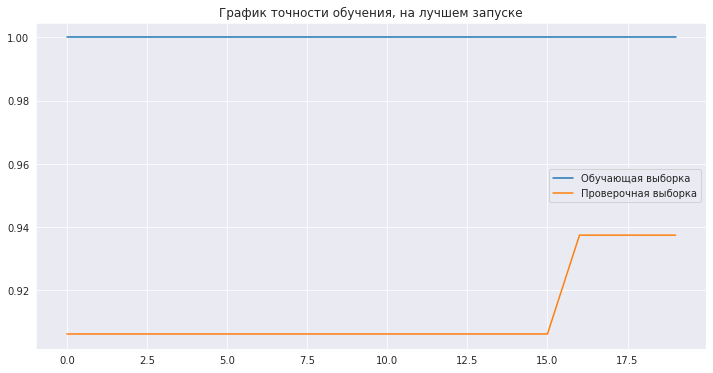

In [67]:
# Обучаем модель
эксперимент = терра_ии.обучение_модели(
    нейронка_ДЗ_2,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 50,
    количество_эпох = 20,
    количество_запусков = 5)

### Тестирование модели.

Придумайте и напишите свой отзыв.

In [68]:
# Демонстрация результата работы нейронной сети
отзыв = 'Замечательная машина, отличный ход'
терра_ии.тест_модели_симптомы(нейронка_ДЗ_2, размер_окна, шаг,
                              отзыв, классы = ['Негативный отзыв', 'Позитивный отзыв'])

Негативный отзыв   -  6.3 %
Позитивный отзыв   -  93.7 %

Нейросеть думает, что это: Позитивный отзыв - 93.7%


In [72]:
# Демонстрация результата работы нейронной сети
отзыв = 'От машины ожидал большего за такую стоимость'
терра_ии.тест_модели_симптомы(нейронка_ДЗ_2, размер_окна, шаг,
                              отзыв, классы = ['Негативный отзыв', 'Позитивный отзыв'])

Негативный отзыв   -  56.69 %
Позитивный отзыв   -  43.31 %

Нейросеть думает, что это: Негативный отзыв - 56.69%


In [73]:
# Демонстрация результата работы нейронной сети
отзыв = 'Кондицонер течет, но скорость набирает быстро'
терра_ии.тест_модели_симптомы(нейронка_ДЗ_2, размер_окна, шаг,
                              отзыв, классы = ['Негативный отзыв', 'Позитивный отзыв'])

Негативный отзыв   -  15.16 %
Позитивный отзыв   -  84.84 %

Нейросеть думает, что это: Позитивный отзыв - 84.84%


## Задание № 3. Определение заболевания по симптомам.  

Создайте нейросеть, которая будет определять заболевание по симптомам.

1. Загрузите базу;  
2. Покажите примеры из загруженной базы;  
3. Сделайте предобработку данных для обучающей и тестовой выборки;  
4. Создайте полносвязную модель;  
5. Продемонстрируйте схему созданной модели;  
6. Обучите свою модель;  
7. Проведите тестирование модели.

### Работа с базой.

In [5]:
# Загрузите базу симптомов заболеваний
терра_ии.загрузить_базу(база = 'СИМПТОМЫ ЗАБОЛЕВАНИЙ',
                        справка = 'Показать')

Загрузка данных
Это может занять несколько минут...
Загрузка данных завершена 

url: https://storage.googleapis.com/terra_ai/DataSets/symptoms.zip
Загружена база симптомов заболеваний



In [6]:
# Покажите примеры из базы "симптомы"
терра_ии.показать_примеры(база = 'симптомы')

В данной базе содержатся симптомы следующих заболеваний:
['Аппендицит', 'Гастрит', 'Гепатит', 'Дуоденит', 'Колит', 'Панкреатит', 'Холецистит', 'Эзофагит', 'Энтерит', 'Язва']

Пример симптомов случайного заболевания:
Заболевание:  Дуоденит
Симптомы:
     * боль в эпигастральной области, тошнота, рвота,  общая слабость,  болезненность при пальпации в эпига


In [7]:
количество_анализируемых_слов = 10000
размер_окна = 150
шаг = 50

# Создаем выборки для обучения нейронной сети
(обучающая_выборка, метки_обучающей_выборки), (тестовая_выборка, метки_тестовой_выборки) = терра_ии.создать_текстовые_выборки(
    количество_анализируемых_слов,
    размер_окна, 
    шаг)

Формирование выборки завершено


### Создание сети.
Состоящую из 3-х ветвей, в которую будут входить слои рассмотренные на вебинаре, такие как:

*   Эмбеддинг
*   Выравнивающий
*   Полносвязный



In [8]:
# Создаем нейронную сеть
ветвь1 = 'Эмбеддинг-100-' + str(количество_анализируемых_слов) + '-' + str(размер_окна) + ' Выравнивающий Полносвязный-32'
ветвь2 = 'Полносвязный-128 Полносвязный-64 Полносвязный-32'
ветвь3 = 'Полносвязный-8'

нейронка_ДЗ_3 = терра_ии.создать_составную_сеть(
    обучающая_выборка, метки_обучающей_выборки,
    ветвь1, ветвь2, ветвь3)

Визуализация модели.

Схема модели:


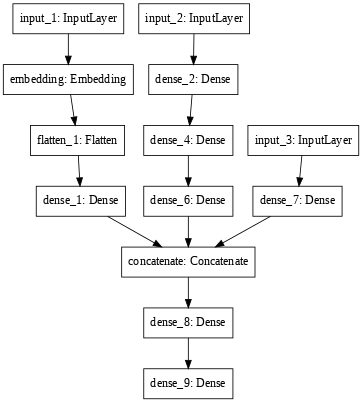

In [9]:
# Покажите структуру сети, с помощью функции из terra_ai. терра_ии.схема_модели(внутри функции указывается нейросеть, которую вы создали)
терра_ии.схема_модели(нейронка_ДЗ_3)

### Обучение нейронной сети.
Используя свою модель, примените функцию из terra ai:
*   терра_ии.обучение_модели()




Запуск №1   Время обучения: 77.85cТочность на обучающей выборке: 100.0%      Точность на проверочной выборке: 70.0%
Запуск №2   Время обучения: 79.45cТочность на обучающей выборке: 100.0%      Точность на проверочной выборке: 75.0%
Запуск №3   Время обучения: 79.25cТочность на обучающей выборке: 100.0%      Точность на проверочной выборке: 75.0%
Запуск №4   Время обучения: 78.03cТочность на обучающей выборке: 100.0%      Точность на проверочной выборке: 75.0%
Запуск №5   Время обучения: 79.45cТочность на обучающей выборке: 100.0%      Точность на проверочной выборке: 75.0%

Средняя точность на обучающей выборке:    100.0% 
Средняя точность на проверочной выборке:  74.0%


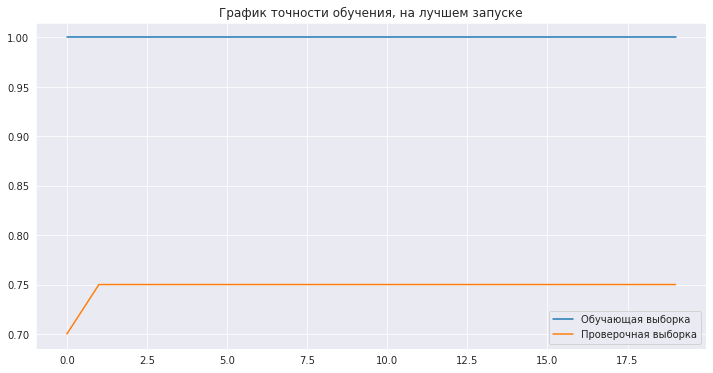

In [10]:
# Обучаем модель
эксперимент = терра_ии.обучение_модели(
    нейронка_ДЗ_3,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 200,
    количество_эпох = 20,
    количество_запусков = 5)

### Продемонстрируйте работу нейронной сети
Используя обученую модель для симптомов указанных в ячейке, примените функцию из terra ai:
*   терра_ии.тест_модели_симптомы()  

Можете создать другой перечень симптомов и посмотреть насколько успешно модель справляется.

In [11]:
# Демонстрация результата работы нейронной сети
симптомы = 'общую слабость;повышение температуры тела;систематические приступы тошноты;регулярную рвоту с примесями желчи.'
терра_ии.тест_модели_симптомы(нейронка_ДЗ_3, размер_окна, шаг,
                              симптомы, классы=['Колит', 'Гепатит', 'Гастрит', 'Холицестит', 'Дуоденит', 'Энтерит', 'Язва', 'Эзофагит', 'Аппендицит', 'Панкреатит'])

Колит          -  19.76 %
Гепатит        -  8.71 %
Гастрит        -  8.0 %
Холицестит     -  9.72 %
Дуоденит       -  5.56 %
Энтерит        -  10.25 %
Язва           -  12.13 %
Эзофагит       -  5.95 %
Аппендицит     -  12.14 %
Панкреатит     -  7.77 %

Нейросеть думает, что это: Колит - 19.76%
